# 52-week high and low trading strategy

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import yfinance as yf

## Weeks

In [2]:
# Если качать с auto_adjust=True, то из-за дивидендов появляется NaN в некоторых строках.
# Проблема у биб-ки yfinance см. их github
bac_wk_df = pd.read_csv('../../data/BAC_2002-01-01_2022-12-31_1wk_NO-ADJUST.csv', index_col=0, parse_dates=True)
bac_wk_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-12-23,32.400002,32.580002,32.189999,32.470001,32.260765,21378600,0.0,0.0
2022-12-27,32.500000,32.669998,32.279999,32.529999,32.320374,22776100,0.0,0.0
2022-12-28,32.570000,32.970001,32.529999,32.770000,32.558830,30541000,0.0,0.0
2022-12-29,32.889999,33.160000,32.750000,33.139999,32.926445,22252900,0.0,0.0
2022-12-30,33.099998,33.299999,32.860001,33.119999,32.906574,28198900,0.0,0.0


In [4]:
bac_wk_df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [5]:
bac_wk_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,32.400002,32.580002,32.189999,32.470001,32.260765,21378600
2022-12-27,32.500000,32.669998,32.279999,32.529999,32.320374,22776100
2022-12-28,32.570000,32.970001,32.529999,32.770000,32.558830,30541000
2022-12-29,32.889999,33.160000,32.750000,33.139999,32.926445,22252900
2022-12-30,33.099998,33.299999,32.860001,33.119999,32.906574,28198900


## Days

In [3]:
bac_df = pd.read_csv('../../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
#bac_df.set_index('Date', inplace=True)
bac_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-23,32.191216,32.370057,31.982567,32.260765,21378600,0.0,0.0
2022-12-27,32.290568,32.459471,32.071985,32.320374,22776100,0.0,0.0
2022-12-28,32.360118,32.757542,32.320375,32.558830,30541000,0.0,0.0
2022-12-29,32.678056,32.946317,32.538959,32.926445,22252900,0.0,0.0
2022-12-30,32.886703,33.085415,32.648251,32.906574,28198900,0.0,0.0


In [7]:
bac_df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [8]:
_52weeks_bac_df = bac_df.copy()

_52weeks_bac_df['52weeksMIN']  = bac_df['Close'].rolling(window=260).min()
_52weeks_bac_df['52weeksMEAN'] = bac_df['Close'].rolling(window=260).mean()
_52weeks_bac_df['52weeksMAX']  = bac_df['Close'].rolling(window=260).max()
_52weeks_bac_df.tail(10)

,Open,High,Low,Close,Volume,52weeksMIN,52weeksMEAN,52weeksMAX
Date,,,,,,,,
2022-12-16,31.416241,31.724243,31.147981,31.495726,61795200,29.40624,37.063324,47.945427
2022-12-19,31.555337,32.022308,31.525530,31.853405,38374100,29.40624,37.018872,47.945427
2022-12-20,32.191215,32.370055,31.932888,31.982565,35561100,29.40624,36.976970,47.945427
2022-12-21,32.310441,32.658184,32.201149,32.469410,32544000,29.40624,36.935708,47.945427
2022-12-22,32.310442,32.370056,31.664631,32.181278,30234400,29.40624,36.893226,47.945427
2022-12-23,32.191216,32.370057,31.982567,32.260765,21378600,29.40624,36.854560,47.945427
2022-12-27,32.290568,32.459471,32.071985,32.320374,22776100,29.40624,36.814069,47.945427
2022-12-28,32.360118,32.757542,32.320375,32.558830,30541000,29.40624,36.775205,47.945427
2022-12-29,32.678056,32.946317,32.538959,32.926445,22252900,29.40624,36.733797,47.945427


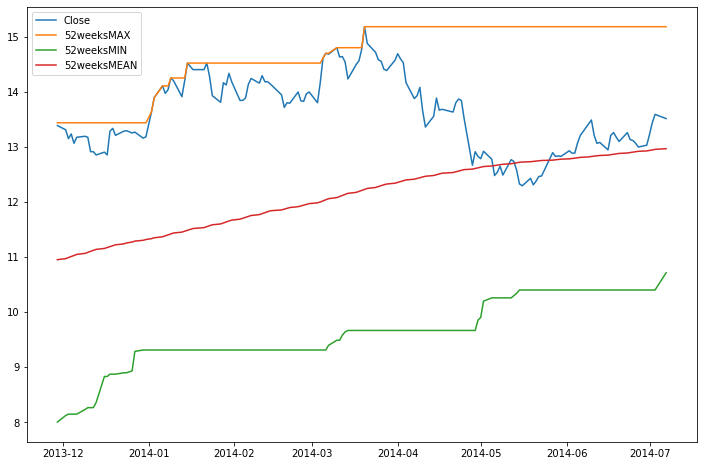

In [9]:
close_price  = _52weeks_bac_df['Close'][3000:3150]
_52weeks_max = _52weeks_bac_df['52weeksMAX'][3000:3150]
_52weeks_min = _52weeks_bac_df['52weeksMIN'][3000:3150]
_52weeks_mean = _52weeks_bac_df['52weeksMEAN'][3000:3150]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(close_price.index, close_price, label='Close')
ax.plot(close_price.index, _52weeks_max, label='52weeksMAX')
ax.plot(close_price.index, _52weeks_min, label='52weeksMIN')
ax.plot(close_price.index, _52weeks_mean, label='52weeksMEAN')
plt.legend()

In [27]:
close   = _52weeks_bac_df[2500:2501]['Close']
_52_min = _52weeks_bac_df[2500:2501]['52weeksMIN']
_52_max = _52weeks_bac_df[2500:2501]['52weeksMAX']

In [38]:
 _52_max, close, _52_min

(Date
 2011-12-02    12.75161
 Name: 52weeksMAX, dtype: float64, Date
 2011-12-02    4.738563
 Name: Close, dtype: float64, Date
 2011-12-02    4.259666
 Name: 52weeksMIN, dtype: float64)

In [36]:
round((close - _52_min) / (_52_max - _52_min) * 100, 2)

Date
2011-12-02    5.64
dtype: float64

In [96]:
_52weeks_test = _52weeks_bac_df[2500:]
_52weeks_test

,Open,High,Low,Close,Volume,52weeksMIN,52weeksMEAN,52weeksMAX
Date,,,,,,,,
2011-12-02,4.763768,4.940204,4.713358,4.738563,283132900,4.259666,8.870942,12.751610
2011-12-05,4.923403,4.999018,4.814180,4.864591,293977700,4.259666,8.854019,12.751610
2011-12-06,4.822582,4.973813,4.788975,4.856189,254787200,4.259666,8.836453,12.751610
2011-12-07,4.814181,4.973813,4.788975,4.948608,244700100,4.259666,8.819756,12.751610
2011-12-08,4.906599,4.940206,4.646146,4.696556,286031100,4.259666,8.801479,12.751610
...,...,...,...,...,...,...,...,...
2022-12-23,32.191216,32.370057,31.982567,32.260765,21378600,29.406240,36.854560,47.945427
2022-12-27,32.290568,32.459471,32.071985,32.320374,22776100,29.406240,36.814069,47.945427
2022-12-28,32.360118,32.757542,32.320375,32.558830,30541000,29.406240,36.775205,47.945427


In [97]:
_52weeks_test.drop('52weeksMEAN', axis=1, inplace=True)
_52weeks_test

f:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Volume,52weeksMIN,52weeksMAX
Date,,,,,,,
2011-12-02,4.763768,4.940204,4.713358,4.738563,283132900,4.259666,12.751610
2011-12-05,4.923403,4.999018,4.814180,4.864591,293977700,4.259666,12.751610
2011-12-06,4.822582,4.973813,4.788975,4.856189,254787200,4.259666,12.751610
2011-12-07,4.814181,4.973813,4.788975,4.948608,244700100,4.259666,12.751610
2011-12-08,4.906599,4.940206,4.646146,4.696556,286031100,4.259666,12.751610
...,...,...,...,...,...,...,...
2022-12-23,32.191216,32.370057,31.982567,32.260765,21378600,29.406240,47.945427
2022-12-27,32.290568,32.459471,32.071985,32.320374,22776100,29.406240,47.945427
2022-12-28,32.360118,32.757542,32.320375,32.558830,30541000,29.406240,47.945427


In [98]:
# round((close - _52_min) / (_52_max - _52_min) * 100, 2)
_52weeks_test['Signal %'] =round((_52weeks_test['Close'] - _52weeks_test['52weeksMIN'])/(_52weeks_test['52weeksMAX'] - _52weeks_test['52weeksMIN'])*100 , 2)

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [99]:
_52weeks_test

,Open,High,Low,Close,Volume,52weeksMIN,52weeksMAX,Signal %
Date,,,,,,,,
2011-12-02,4.763768,4.940204,4.713358,4.738563,283132900,4.259666,12.751610,5.64
2011-12-05,4.923403,4.999018,4.814180,4.864591,293977700,4.259666,12.751610,7.12
2011-12-06,4.822582,4.973813,4.788975,4.856189,254787200,4.259666,12.751610,7.02
2011-12-07,4.814181,4.973813,4.788975,4.948608,244700100,4.259666,12.751610,8.11
2011-12-08,4.906599,4.940206,4.646146,4.696556,286031100,4.259666,12.751610,5.14
...,...,...,...,...,...,...,...,...
2022-12-23,32.191216,32.370057,31.982567,32.260765,21378600,29.406240,47.945427,15.40
2022-12-27,32.290568,32.459471,32.071985,32.320374,22776100,29.406240,47.945427,15.72
2022-12-28,32.360118,32.757542,32.320375,32.558830,30541000,29.406240,47.945427,17.01


In [63]:
def buy_or_sell(row):
    if row['Signal %'] <= 30:
        signal = 'Buy'
    elif row['Signal %'] > 30 and row['Signal %'] < 70:
        signal = np.nan
    else:
        signal = 'Sell'
    return signal

In [103]:
_52weeks_test['Signal'] = _52weeks_test.apply(buy_or_sell, axis=1)
_52weeks_test

,Open,High,Low,Close,Volume,52weeksMIN,52weeksMAX,Signal %,Signal
Date,,,,,,,,,
2011-12-02 00:00:00,4.763768,4.940204,4.713358,4.738563,283132900.0,4.259666,12.751610,5.64,Buy
2011-12-05 00:00:00,4.923403,4.999018,4.814180,4.864591,293977700.0,4.259666,12.751610,7.12,Buy
2011-12-06 00:00:00,4.822582,4.973813,4.788975,4.856189,254787200.0,4.259666,12.751610,7.02,Buy
2011-12-07 00:00:00,4.814181,4.973813,4.788975,4.948608,244700100.0,4.259666,12.751610,8.11,Buy
2011-12-08 00:00:00,4.906599,4.940206,4.646146,4.696556,286031100.0,4.259666,12.751610,5.14,Buy
...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00,32.290568,32.459471,32.071985,32.320374,22776100.0,29.406240,47.945427,15.72,Buy
2022-12-28 00:00:00,32.360118,32.757542,32.320375,32.558830,30541000.0,29.406240,47.945427,17.01,Buy
2022-12-29 00:00:00,32.678056,32.946317,32.538959,32.926445,22252900.0,29.406240,47.945427,18.99,Buy


In [104]:
buy = _52weeks_test[_52weeks_test['Signal'] == 'Buy']['Close']
buy

Date
2011-12-02     4.738563
2011-12-05     4.864591
2011-12-06     4.856189
2011-12-07     4.948608
2011-12-08     4.696556
                ...    
2022-12-23    32.260765
2022-12-27    32.320374
2022-12-28    32.558830
2022-12-29    32.926445
2022-12-30    32.906574
Name: Close, Length: 400, dtype: float64

In [73]:
sell = _52weeks_test[_52weeks_test['Signal'] == 'Sell']['Close']

In [70]:
_52weeks_test[_52weeks_test['Signal'].isna()]['Close'].count()

902

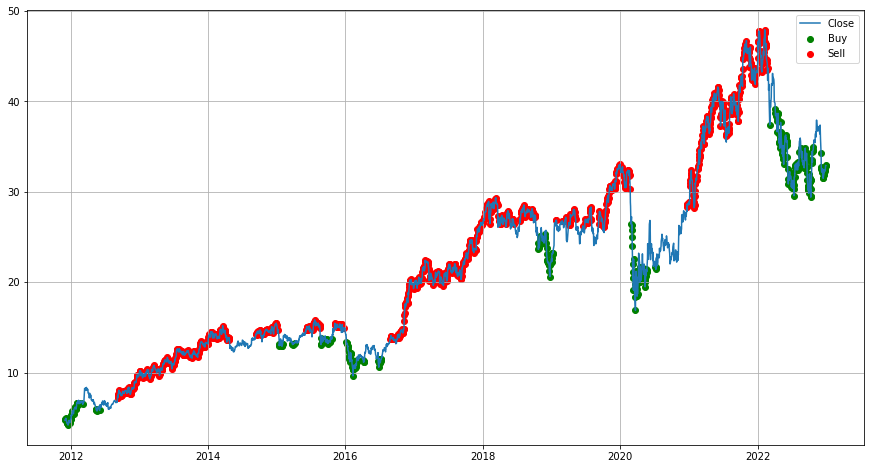

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(_52weeks_test.index, _52weeks_test['Close'], label='Close')
ax.scatter(buy.index, buy, label='Buy', c='g')
ax.scatter(sell.index, sell, label='Sell', c='r')
ax.grid()
plt.legend()

## Touch Points

In [66]:
bac_df_0_3000 = bac_df[:3000]
bac_df_0_3000.shape

(3000, 5)

In [67]:
bac_df_3000_5288 = bac_df[3000:]
bac_df_3000_5288.shape

(2288, 5)

In [90]:
_52days_bac_max = _52days_bac_df[_52days_bac_df['Close'] == _52days_bac_df['52daysMAX']]
_52days_bac_min = _52days_bac_df[_52days_bac_df['Close'] == _52days_bac_df['52daysMIN']]
_52days_bac_max.shape

(538, 7)

In [91]:
_52days_bac_min.shape

(304, 7)

In [92]:
_52days_bac_max.head(10)

,Open,High,Low,Close,Volume,52daysMIN,52daysMAX
Date,,,,,,,
2002-03-15,20.492793,20.976755,20.405075,20.925335,19066600,17.632923,20.925335
2002-04-08,20.507920,21.112873,20.507920,21.016081,10931400,17.632923,21.016081
2002-04-09,21.016080,21.158242,20.979782,21.082623,8511200,17.632923,21.082623
2002-04-10,21.037251,21.200586,20.976754,21.155216,15897200,17.632923,21.155216
2002-04-12,20.916253,21.188482,20.846682,21.188482,12408800,17.632923,21.188482
2002-04-16,21.143115,21.451640,21.103792,21.391146,15885400,17.632923,21.391146
2002-04-17,21.330647,21.536331,21.203607,21.415342,14004600,17.632923,21.415342
2002-04-19,21.475843,21.763195,21.394176,21.663380,12846200,17.632923,21.663380
2002-04-23,21.475840,21.893257,21.415345,21.778316,13752200,17.662882,21.778316


In [93]:
_52days_bac_min.head(10)

,Open,High,Low,Close,Volume,52daysMIN,52daysMAX
Date,,,,,,,
2002-06-26,20.766118,21.025313,20.375801,20.567909,22387200,20.567909,23.260456
2002-07-16,20.445943,20.695990,20.076969,20.217241,14742200,20.217241,23.260456
2002-07-17,20.506933,20.647203,19.637866,19.820827,15897000,19.820827,23.260456
2002-07-18,19.790341,19.942809,18.939569,19.092037,14895000,19.092037,23.260456
2002-07-19,19.012743,19.092027,18.616327,18.759647,16266800,18.759647,23.260456
2002-07-22,18.637670,19.043235,18.143675,18.378475,20690000,18.378475,23.260456
2002-07-23,18.448617,18.662073,17.472822,17.655785,30282400,17.655785,23.260456
2002-10-04,18.430379,18.854985,17.501168,17.845776,21492200,17.845776,21.772413
2002-10-07,17.848855,18.122696,16.987335,17.107332,18664200,17.107332,21.772413


In [182]:
date = _52days_bac_max.index[0]
date

Timestamp('2002-03-15 00:00:00')

In [183]:
date_l = _52days_bac_df.index.tolist()
start_date = date_l.index(date) - 50
end_date = date_l.index(date) + 50
(start_date, end_date)

(1, 101)

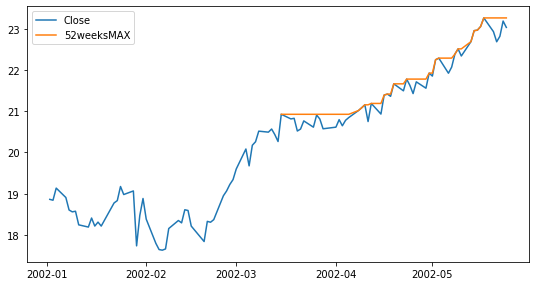

In [184]:
hit_52days_max = _52days_bac_df.iloc[start_date:end_date]

close_price  = hit_52days_max['Close']
_52weeks_max = hit_52days_max['52daysMAX']

fig, ax = plt.subplots(figsize=(9, 4.7))
ax.plot(close_price.index, close_price, label='Close')
ax.plot(close_price.index, _52weeks_max, label='52weeksMAX')
plt.legend()

## Strategy

In [2]:
bac_df = pd.read_csv('../../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bac_df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [3]:
bac_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-23,32.191216,32.370057,31.982567,32.260765,21378600
2022-12-27,32.290568,32.459471,32.071985,32.320374,22776100
2022-12-28,32.360118,32.757542,32.320375,32.558830,30541000
2022-12-29,32.678056,32.946317,32.538959,32.926445,22252900
2022-12-30,32.886703,33.085415,32.648251,32.906574,28198900


In [5]:
data = bac_df.Close.to_frame()
data

,Close
Date,
2001-12-31,18.861378
2002-01-02,18.864384
2002-01-03,18.843409
2002-01-04,19.137033
2002-01-07,18.909319
...,...
2022-12-23,32.260765
2022-12-27,32.320374
2022-12-28,32.558830


In [6]:
data['52w_max']  = data['Close'].rolling(window=260).max()
data['52w_min']  = data['Close'].rolling(window=260).min()
data

,Close,52w_max,52w_min
Date,,,
2001-12-31,18.861378,NaN,NaN
2002-01-02,18.864384,NaN,NaN
2002-01-03,18.843409,NaN,NaN
2002-01-04,19.137033,NaN,NaN
2002-01-07,18.909319,NaN,NaN
...,...,...,...
2022-12-23,32.260765,47.945427,29.40624
2022-12-27,32.320374,47.945427,29.40624
2022-12-28,32.558830,47.945427,29.40624


In [7]:
data.dropna(inplace=True)
data

,Close,52w_max,52w_min
Date,,,
2003-01-10,22.297760,23.260456,16.66119
2003-01-13,22.477890,23.260456,16.66119
2003-01-14,22.508940,23.260456,16.66119
2003-01-15,22.189075,23.260456,16.66119
2003-01-16,22.049322,23.260456,16.66119
...,...,...,...
2022-12-23,32.260765,47.945427,29.40624
2022-12-27,32.320374,47.945427,29.40624
2022-12-28,32.558830,47.945427,29.40624


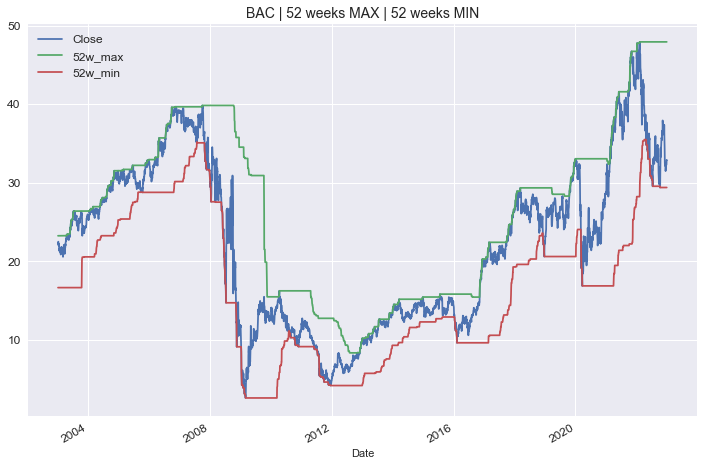

In [8]:
data.plot(figsize=(12, 8), fontsize=12)
plt.title('BAC | 52 weeks MAX | 52 weeks MIN', fontsize=14)
plt.legend(fontsize=12)

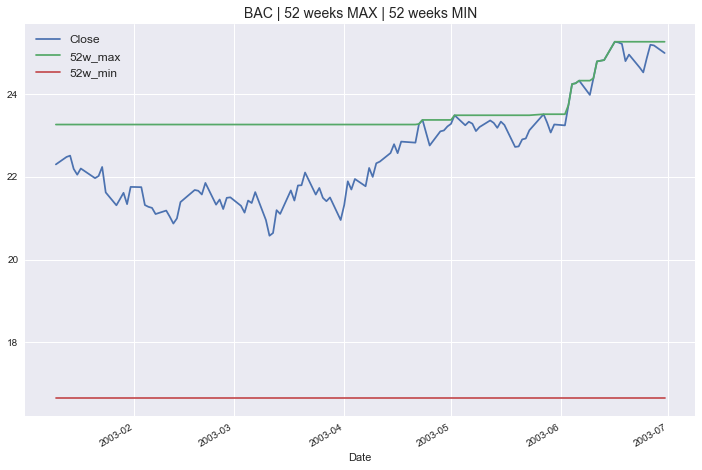

In [9]:
data.loc['2003-01':'2003-06', ['Close', '52w_max', '52w_min']].plot(figsize=(12, 8))
plt.title('BAC | 52 weeks MAX | 52 weeks MIN', fontsize=14)
plt.legend(fontsize=12)

In [21]:
def set_position(row):
    res = (row['Close'] - row['52w_min']) / (row['52w_max'] - row['52w_min']) * 100
    if res <= 30:
        return 1
    elif res >= 70:
        return -1
    else:
        return 0

In [22]:
data['position'] = data.apply(set_position, axis=1)
data

,Close,52w_max,52w_min,position,returnsb&h,strategy
Date,,,,,,
2003-01-13,22.477890,23.260456,16.66119,-1,0.008046,-0.008046
2003-01-14,22.508940,23.260456,16.66119,-1,0.001380,-0.001380
2003-01-15,22.189075,23.260456,16.66119,-1,-0.014312,0.014312
2003-01-16,22.049322,23.260456,16.66119,-1,-0.006318,0.006318
2003-01-17,22.198387,23.260456,16.66119,-1,0.006738,-0.006738
...,...,...,...,...,...,...
2022-12-23,32.260765,47.945427,29.40624,1,0.002467,0.002467
2022-12-27,32.320374,47.945427,29.40624,1,0.001846,0.001846
2022-12-28,32.558830,47.945427,29.40624,1,0.007351,0.007351


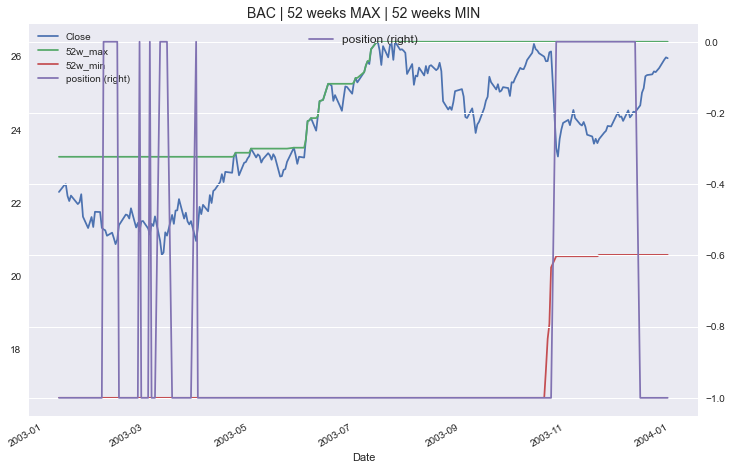

In [13]:
data.loc['2003',['Close','52w_max','52w_min','position']].plot(figsize=(12, 8),secondary_y='position')
plt.title('BAC | 52 weeks MAX | 52 weeks MIN', fontsize=14)
plt.legend(fontsize=12)

In [14]:
data['returnsb&h'] = np.log(data.Close.div(data.Close.shift(1)))
data

,Close,52w_max,52w_min,position,returnsb&h
Date,,,,,
2003-01-10,22.297760,23.260456,16.66119,-1,NaN
2003-01-13,22.477890,23.260456,16.66119,-1,0.008046
2003-01-14,22.508940,23.260456,16.66119,-1,0.001380
2003-01-15,22.189075,23.260456,16.66119,-1,-0.014312
2003-01-16,22.049322,23.260456,16.66119,-1,-0.006318
...,...,...,...,...,...
2022-12-23,32.260765,47.945427,29.40624,1,0.002467
2022-12-27,32.320374,47.945427,29.40624,1,0.001846
2022-12-28,32.558830,47.945427,29.40624,1,0.007351


In [15]:
data['strategy'] = data['returnsb&h'] * data.position.shift(1)
data

,Close,52w_max,52w_min,position,returnsb&h,strategy
Date,,,,,,
2003-01-10,22.297760,23.260456,16.66119,-1,NaN,NaN
2003-01-13,22.477890,23.260456,16.66119,-1,0.008046,-0.008046
2003-01-14,22.508940,23.260456,16.66119,-1,0.001380,-0.001380
2003-01-15,22.189075,23.260456,16.66119,-1,-0.014312,0.014312
2003-01-16,22.049322,23.260456,16.66119,-1,-0.006318,0.006318
...,...,...,...,...,...,...
2022-12-23,32.260765,47.945427,29.40624,1,0.002467,0.002467
2022-12-27,32.320374,47.945427,29.40624,1,0.001846,0.001846
2022-12-28,32.558830,47.945427,29.40624,1,0.007351,0.007351


In [16]:
data.dropna(inplace=True)

In [17]:
data[['returnsb&h', 'strategy']].sum().apply(np.exp)

returnsb&h    1.475779
strategy      0.204118
dtype: float64

In [18]:
data[['returnsb&h', 'strategy']].sum()

returnsb&h    0.389186
strategy     -1.589057
dtype: float64

In [19]:
data[['returnsb&h', 'strategy']].std() * np.sqrt(252)

returnsb&h    0.459418
strategy      0.404773
dtype: float64

<AxesSubplot:xlabel='Date'>

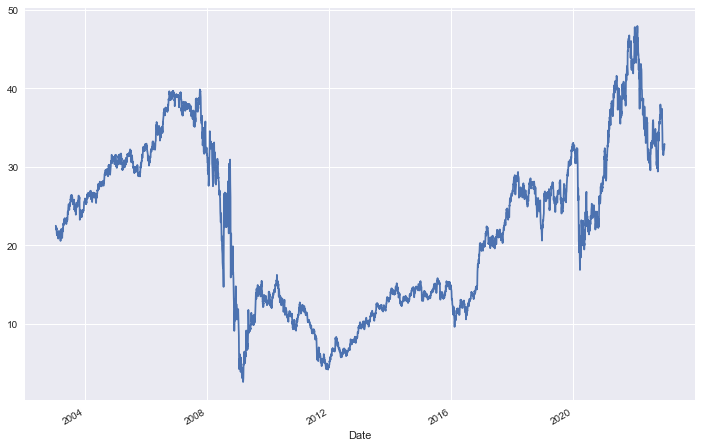

In [19]:
data.Close.plot(figsize=(12, 8))

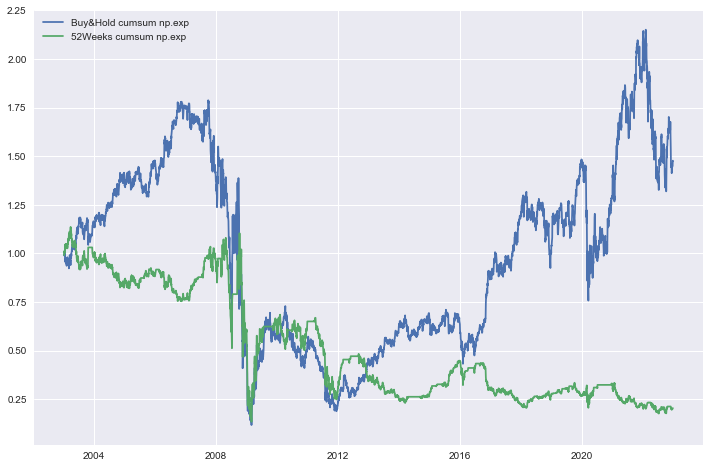

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(data.index, data['returnsb&h'].cumsum(), label='Buy&Hold cumsum')
ax.plot(data.index, data['returnsb&h'].cumsum().apply(np.exp), label='Buy&Hold cumsum np.exp')
# ax.plot(data.index, data['strategy'].cumsum(), label='52Weeks cumsum')
ax.plot(data.index, data['strategy'].cumsum().apply(np.exp), label='52Weeks cumsum np.exp')
plt.legend()

In [36]:
sample = pd.DataFrame([0.1, 0.3, -0.3, 0.2, -0.1, -0.4], columns=['Returns'])
sample['CumSum'] = sample['Returns'].cumsum()
sample['CumSumExp'] = sample['Returns'].cumsum().apply(np.exp)
sample

,Returns,CumSum,CumSumExp
0,0.1,0.1,1.105171
1,0.3,0.4,1.491825
2,-0.3,0.1,1.105171
3,0.2,0.3,1.349859
4,-0.1,0.2,1.221403
5,-0.4,-0.2,0.818731


## BacktestClass

In [37]:
class _52WeeksBacktester():
    def __init__(self, symbol, start, end):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
    
    def get_data(self):
        df = yf.download(self.symbol, start=self.start, end=self.end)
        data = df.Close.to_frame()
        data['returns'] = np.log(data.Close.div(data.Close.shift(1)))
        data['52w_max']  = data['Close'].rolling(window=225).max()
        data['52w_min']  = data['Close'].rolling(window=252).min()
        data.dropna(inplace=True)
        
        self.data2 = data
        return data
    
    def set_position(self, row):
        res = (row['Close'] - row['52w_min']) / (row['52w_max'] - row['52w_min']) * 100
        if res <= 30:
            return 1
        elif res >= 70:
            return -1
        else:
            return 0

    def test_results(self):
        data = self.data2.copy().dropna()
        data['position'] = data.apply(set_position, axis=1)
        data['strategy'] = data['returns'] * data.position.shift(1)
        data.dropna(inplace=True)
        
        data['returnsbh'] = data['returns'].cumsum().apply(np.exp)
        data['returntsstrategy'] = data['strategy'].cumsum().apply(np.exp)
        
        perf = data['returntsstrategy'].iloc[-1]
        outperf = perf - data['returnsbh'].iloc[-1]
        self.results = data
        
        ret = np.exp(data['strategy'].sum())
        std = data['strategy'].std() * np.sqrt(252)
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please")
        else:
            title = f'{self.symbol} | 52 Weeks Strategy'
            self.results[['returnsbh', 'returntsstrategy']].plot(title=title, figsize=(12, 8))

In [39]:
tester = _52WeeksBacktester('BK', '2000-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [40]:
tester.test_results()

(13.53497, 12.674606)

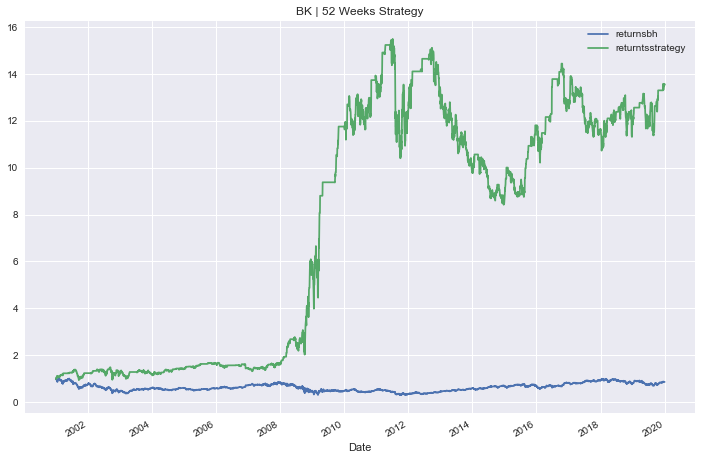

In [41]:
tester.plot_results()

In [42]:
bac = _52WeeksBacktester('BAC', '2000-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [43]:
bac.test_results()

(0.727023, -0.808454)

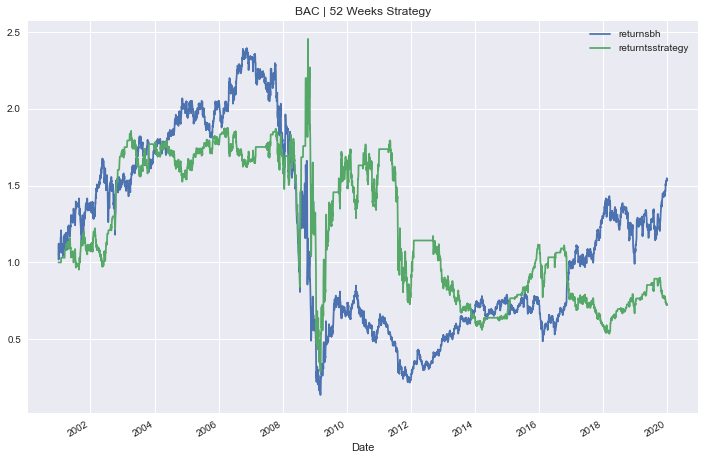

In [45]:
bac.plot_results()